Loading data...
Engineering features...
Training Random Forest Regressor (this may take a few seconds)...

 RANDOM FOREST METRICS 
Mean Absolute Error (MAE): 1.5619 rings
Root Mean Squared Error (RMSE): 2.2277 rings
R^2 Score: 0.5416
Tolerance Accuracy (+/- 1 Ring): 63.52%

Generating Evaluation Charts...
Charts saved successfully as 'random_forest_graphs.png'!


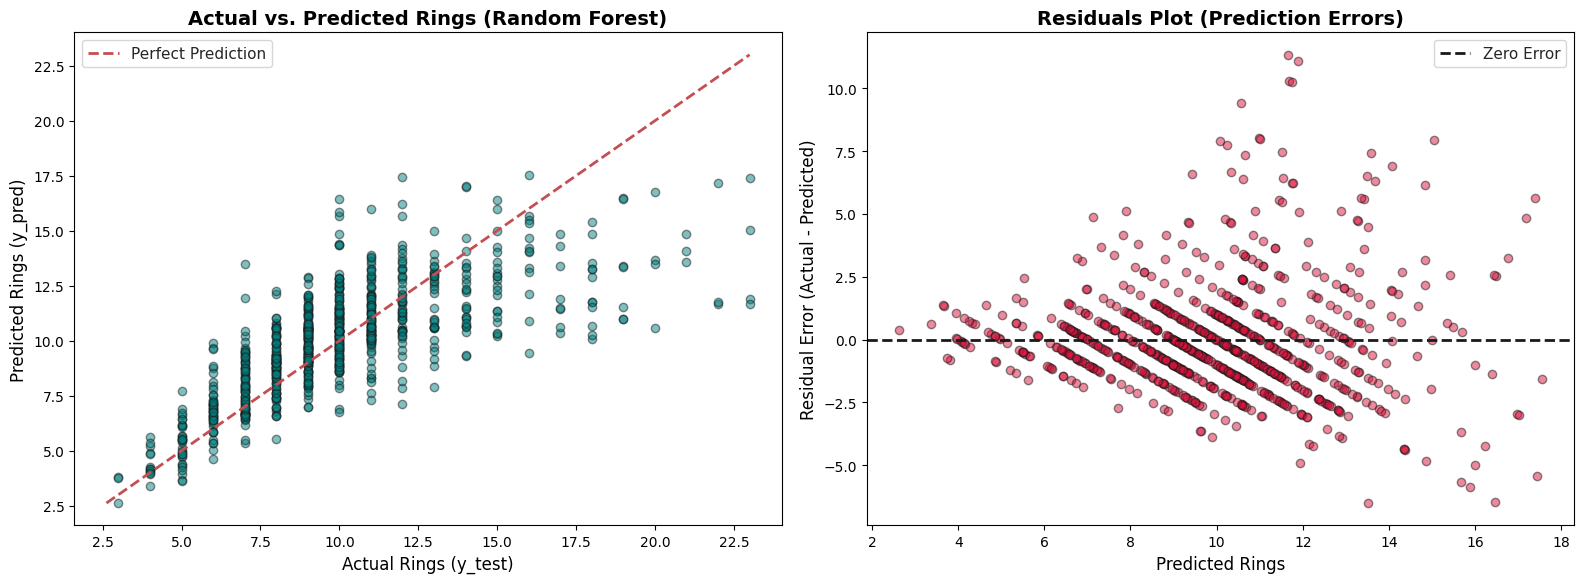

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("Loading data...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df = pd.read_csv(url, names=column_names)


print("Engineering features...")
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
df['Density'] = df['Whole_weight'] / (df['Volume'] + 1e-5)

X = df.drop('Rings', axis=1)
y = df['Rings']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training Random Forest Regressor (this may take a few seconds)...")
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)


y_pred = rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


y_pred_rounded = np.round(y_pred)
tolerance_acc = np.mean(np.abs(y_pred_rounded - y_test) <= 1) * 100

print("\n" + "="*50)
print(" RANDOM FOREST METRICS ")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.4f} rings")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} rings")
print(f"R^2 Score: {r2:.4f}")
print(f"Tolerance Accuracy (+/- 1 Ring): {tolerance_acc:.2f}%")
print("="*50)


print("\nGenerating Evaluation Charts...")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style="whitegrid")


axes[0].scatter(y_test, y_pred, alpha=0.5, color='teal', edgecolor='k')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

axes[0].set_title('Actual vs. Predicted Rings (Random Forest)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Actual Rings (y_test)', fontsize=12)
axes[0].set_ylabel('Predicted Rings (y_pred)', fontsize=12)
axes[0].legend()


residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5, color='crimson', edgecolor='k')

axes[1].axhline(y=0, color='k', linestyle='--', linewidth=2, label='Zero Error')

axes[1].set_title('Residuals Plot (Prediction Errors)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Rings', fontsize=12)
axes[1].set_ylabel('Residual Error (Actual - Predicted)', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.savefig('random_forest_graphs.png')
print("Charts saved successfully as 'random_forest_graphs.png'!")